# 1.Business Problem

## 1.1 Problem Context
Topic is analysis of sinking of RMS titanic.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.
* This sensational tragedy shocked the international community and led to better safety regulations for ships.

## 1.2 Problem Statement
Our aim is to predict which passengers survived the tragedy.

* There is dataset available with information of passengers.
* The dataset contains information of those passengers who survived along with those passengers who didn't.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* There was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than         others, such as women, children, and the upper-class.
* We need to analyse this dataset and make a model to predict which passengers survived the tragedy.

## 1.3 Business Objectives and Constraints

* Deliverable: Trained model file.
* output with prediction.

# 2. Machine Learning Problem

## 2.1 Data Overview
 For this project:
 
 1.The dataset has 1309 observations.
 2.891 observations are used as training data to train the model.
 3.418 observations will be used as testing data to test the model.
 
 ### features of data:
 * survival	- Survival; 0= No, 1 = Yes
 * pclass - Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd
 * sex - Sex	
 * Age - Age in years	
 * sibsp - # of siblings / spouses aboard the Titanic	
 * parch - # of parents / children aboard the Titanic	
 * ticket - Ticket number	
 * fare - Passenger fare	
 * cabin - Cabin number	
 * embarked - Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
 
 * pclass: A proxy for socio-economic status (SES)
   1st = Upper
   2nd = Middle
   3rd = Lower

 * age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

 * sibsp: The dataset defines family relations in this way...
   Sibling = brother, sister, stepbrother, stepsister
   Spouse = husband, wife (mistresses and fiancés were ignored)

 * parch: The dataset defines family relations in this way...
   Parent = mother, father
   Child = daughter, son, stepdaughter, stepson
   Some children travelled only with a nanny, therefore parch=0 for them.
   
## 2.2 Mapping Business problem to ML problem

### 2.2.1 Type of Machine Learning Problem
It is a binary classification task, where given a set of features we need to predict whether the passenger is likely to survive or not.

### 2.2.2 Evaluation Metric (KPI)
Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model


# 3. Exploratory Data Analysis

importing libraries

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# To save the final model on disk
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

# import xgboost
# import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
# from xgboost import XGBClassifier
# from xgboost import plot_importance  ## to plot feature importance

In [2]:
from sklearn.cross_validation import train_test_split
# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from math import sqrt
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 3.1 Reading data


In [7]:
df = pd.read_csv("Files/train.csv")

In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3.2 Distribution of numeric features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF0EE39E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF15CC710>]], dtype=object)

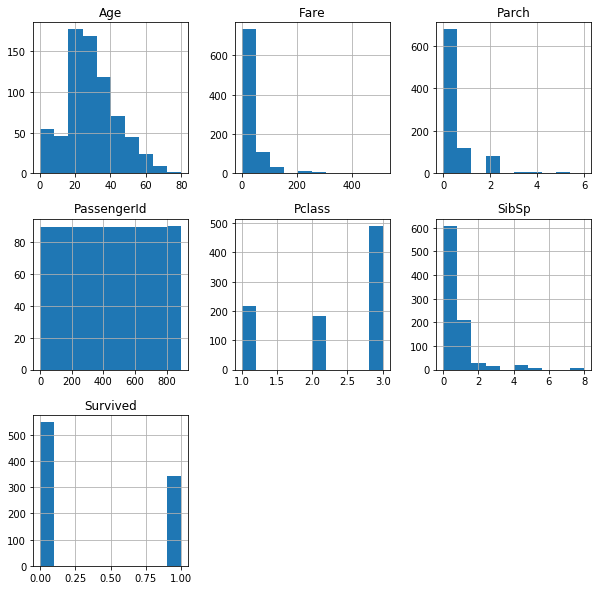

In [13]:
df.hist(figsize=(10,10) , xrot=0)

Observations:
* survived has a binary value(it is either 0 or 1).
* most of the passengers are of age group between 20 to 40.
* maximum fare price is between 0 to 150.

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


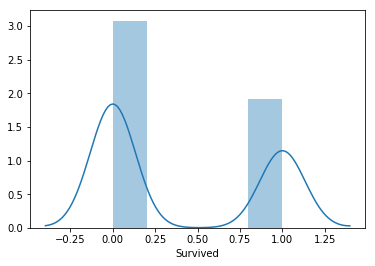

In [15]:
sns.distplot(df['Survived'])

In [16]:
df['Survived'].mean()

0.3838383838383838

From above, we can understand that only 38% of passengers survived.

## 3.3 Distribution of categorical features

In [17]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

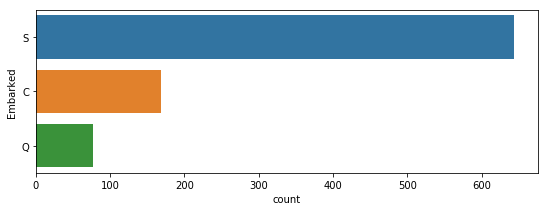

In [19]:
plt.figure(figsize=(9,3))
sns.countplot(y='Embarked', data=df)

# 4.Data Cleaning

## 4.1 Deduplication and droping unwanted observations

In [20]:
df.shape

(891, 12)

In [21]:
# droping the duplicate observations (if any)
df=df.drop_duplicates()
df.shape

(891, 12)

We have no duplicate data.

## 4.2 Typos and Capitalization

there are no typos and capitalization errors here.

## 4.3 Outliers

There are no such outliers present in the data

## 4.4 Missing data

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* There are many values missing from Age and Cabin  columns while 2 values missing from Embarked column.
* Age is numerical data and Cabin and Embarked is categorical data.



filling missing values of age

In [23]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we don't need Cabin and Passengerid. so delete these column.

In [25]:
df = df.drop(['PassengerId','Cabin','Name','Embarked','Ticket'], 1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [26]:
df.shape

(891, 7)

there are 2 values missing in embarked.
so we can drop this 2 values without affecting the data.
so we drop this 2 rows.

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

now all missing values are handled.

In [28]:
# saving the work uptil now
df.to_csv('Files/train-1.csv', index=None)

# 5.Feature Engineering

In [29]:
df.groupby(['Pclass','Sex']).mean()

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.840426  0.553191  0.457447  106.125798
       male    0.368852  40.544426  0.311475  0.278689   67.226127
2      female  0.921053  28.730263  0.486842  0.605263   21.970121
       male    0.157407  30.595648  0.342593  0.222222   19.741782
3      female  0.500000  22.406250  0.895833  0.798611   16.118810
       male    0.135447  25.828300  0.498559  0.224784   12.661633

In [30]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex'] = df['Sex'].map(genders_mapping).astype(int)
# for male 1    
# for female 0

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


##  Handling Sparse Classes

As there are no such sparsity in data so handling is not  required.

# 6.Machine learning models

## Data Preparation

In [32]:
df.shape

(891, 7)

In [33]:
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

## Data standardization

In [35]:
train_mean = X_train.mean()
train_std = X_train.std()

In [36]:
X_train = (X_train - train_mean) / train_std

In [37]:
X_train

array([[-0.39969309, -0.39969309,  1.32905642, -0.44185771, -0.44185771,
         0.66654479],
       [-0.31536385, -0.44185771,  0.61225784, -0.44185771, -0.44185771,
        -0.11402778],
       [-0.31536385, -0.39969309,  0.44359935, -0.44185771, -0.44185771,
         0.2369927 ],
       ..., 
       [-0.31536385, -0.44185771,  0.48576398, -0.44185771, -0.44185771,
        -0.02706324],
       [-0.39969309, -0.44185771,  0.86524558, -0.44185771, -0.35752847,
         6.50968442],
       [-0.31536385, -0.44185771,  1.53987953, -0.39969309, -0.44185771,
         0.16952931]])

In [38]:
X_test = (X_test - train_mean) / train_std

In [39]:
X_test

array([[-0.31536385, -0.39969309,  0.57009322, -0.44185771, -0.44185771,
         0.16952931],
       [-0.31536385, -0.39969309,  0.57009322, -0.44185771, -0.44185771,
        -0.13721832],
       [-0.31536385, -0.39969309,  0.23277624, -0.27319922, -0.39969309,
         1.23155073],
       ..., 
       [-0.31536385, -0.39969309,  1.07606869, -0.39969309, -0.44185771,
         0.21380216],
       [-0.35752847, -0.44185771,  0.61225784, -0.39969309, -0.39969309,
         0.82308095],
       [-0.39969309, -0.39969309,  2.00369038, -0.44185771, -0.35752847,
         4.33433987]])

## Models

## 6.1 Model -1 Logistic Regression

In [40]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [41]:
model.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [43]:
## Predict Test set results
y_pred = model.predict(X_test)

In [44]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [45]:
# Display first 10 predictions
y_pred_proba[:10]

array([ 0.14828996,  0.1435788 ,  0.05402719,  0.39123493,  0.14358149,
        0.15291259,  0.08878027,  0.03750865,  0.83196074,  0.14400793])

In [46]:
print("Train Results for Logistic Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Logistic Regression:
*******************************
Root mean squared error:  0.43336008478153815
R-squared:  0.205772751046
Mean Absolute Error:  0.187800963082


In [47]:
print("Test Results for Logistic Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Logistic Regression:
*******************************
Root mean squared error:  0.45711620391383745
R-squared:  0.116916740218
Mean Absolute Error:  0.208955223881


In [48]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

79.104477611940297

In [49]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[139,  30],
       [ 26,  73]], dtype=int64)

## 6.2 Model-2 Ridge Regression

In [87]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [88]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [90]:
## Predict Test results
y_pred = model.predict(X_test)

In [91]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.3764163424878546
R-squared:  0.40078329937
Mean Absolute Error:  0.292304425305


In [92]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.38312935291856964
R-squared:  0.379646450656
Mean Absolute Error:  0.303217312133


In [93]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

64.925373134328353

In [94]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[165,  94],
       [  0,   9]], dtype=int64)

## 6.3 Model-3 Baseline Model

In [95]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [96]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [97]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  0.48626892401313615
R-squared:  0.0
Mean Absolute Error:  0.472914932922


In [98]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  0.48643659641903353
R-squared:  -2.07526929885e-06
Mean Absolute Error:  0.473078028797


In [99]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

61.567164179104473

In [100]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[165, 103],
       [  0,   0]], dtype=int64)

## 6.4 Model-4 Support Vector Regression

In [101]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [102]:
model.best_estimator_

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.0001)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [104]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [105]:
## Predict Test results
y_pred = model.predict(X_test)

In [106]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  0.40565658924400205
R-squared:  0.304072436959
Mean Absolute Error:  0.242938521822


In [107]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  0.42395223646633323
R-squared:  0.240404679838
Mean Absolute Error:  0.260527836444


In [108]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

62.68656716417911

In [109]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[165, 100],
       [  0,   3]], dtype=int64)

## 6.5 Model-5 Random Forest Regression

In [110]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [111]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [112]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [113]:
## Predict Test results
y_pred = model.predict(X_test)

In [114]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.16053188877753247
R-squared:  0.89101427965
Mean Absolute Error:  0.0944450697297


In [115]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.384725417697935
R-squared:  0.374467067739
Mean Absolute Error:  0.238938147476


In [116]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

67.537313432835816

In [117]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[163,  85],
       [  2,  18]], dtype=int64)

## Results

![title](Images/result.png)

# 7.Save the winning model to disk

In [51]:
win_model = LogisticRegression(C=10, penalty='l1')
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'Files/win_titanic.pkl') 

['Files/win_titanic.pkl']